## 5 计数图 （Counts Plot）
避免点重叠问题的另一个选择是增加点的大小，这取决于该点中有多少点。 因此，点的大小越大，其周围的点的集中度越高。

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.3
0.11.0


In [2]:
# Import Data
df = pd.read_csv("datasets/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

In [3]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [4]:
df_counts

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2
...,...,...,...
73,36,25,1
74,37,28,1
75,41,29,1
76,44,33,1


ValueError: s must be a scalar, or the same size as x and y

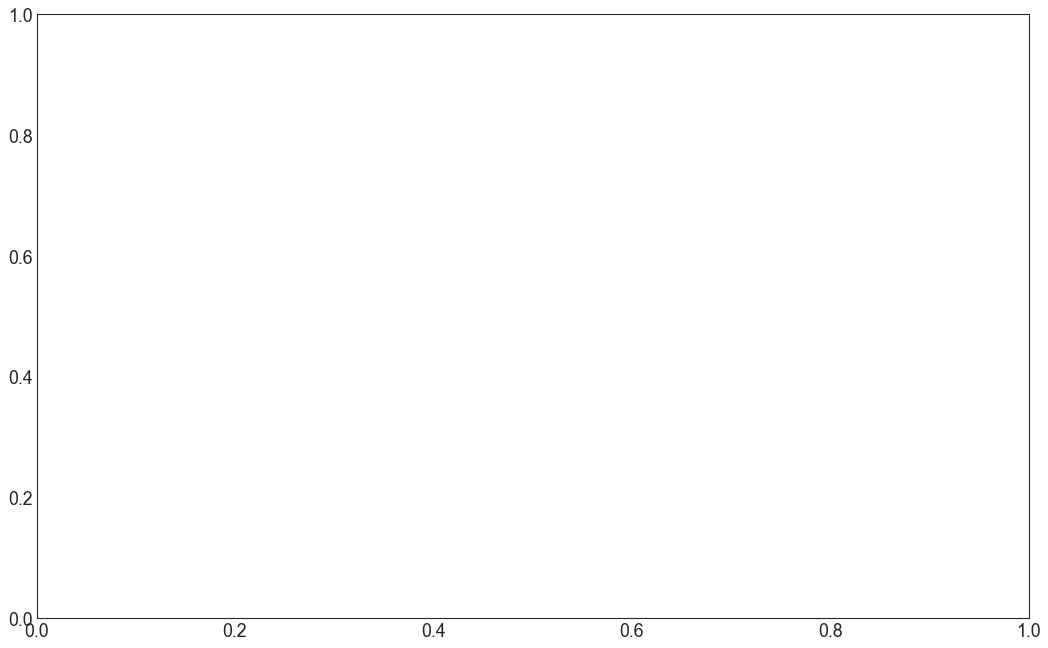

In [5]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(x=df_counts.cty, y=df_counts.hwy, ax=ax, s=df_counts.counts) # 0.11.2 版本的size参数不支持列表？,以下面scatter示例
# plt.scatter(x=df_counts.cty, y=df_counts.hwy, s=df_counts.counts,c=np.random.randn(78))
# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

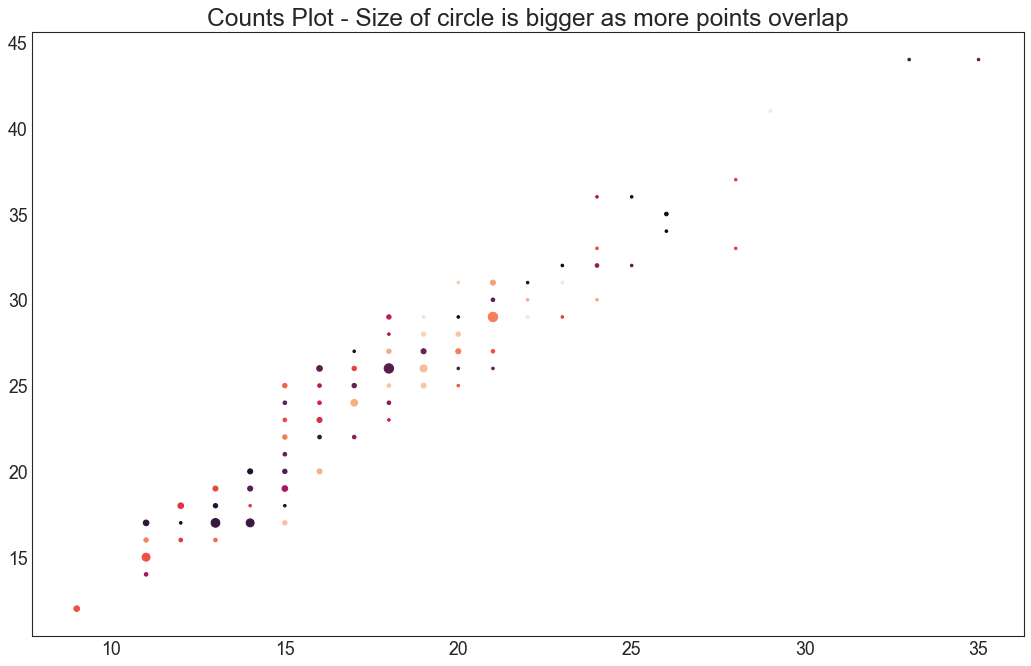

In [6]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# sns.stripplot(x=df_counts.cty, y=df_counts.hwy, size=df_counts.counts, ax=ax)  # 0.11.2 版本的size参数不支持列表？,以下面scatter示例
plt.scatter(x=df_counts.cty, y=df_counts.hwy, s=df_counts.counts*5,c=np.random.rand(df_counts.shape[0]))
# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()